In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

import urllib.request
import io
import zipfile

Didnt put too much effort into this as I focused on final projects for other lectures.

In [2]:
"""No copy of G, G'' is required. 
"""
def newmann_ziff(G : nx.Graph, node_order : list, storage_interval : int = 10):
    n = G.number_of_nodes()
    node_to_label = np.zeros(n, dtype=int)
    cluster_to_nodes = {}
    nodes_added = set()
    current_label = 0

    log_comps = []
    log_max_com = []
    i = 0
    for current_node in node_order:
        nodes_added.add(current_node)
        cluster_to_nodes[current_label] = set([current_node])
        node_to_label[current_node] = current_label

        for neigbour_node in G.neighbors(current_node):
            if node_to_label[neigbour_node] != current_label and neigbour_node in nodes_added:
                cluster_to_nodes[current_label] = \
                    cluster_to_nodes[current_label].union(cluster_to_nodes[node_to_label[neigbour_node]])
                cluster_to_nodes[node_to_label[neigbour_node]].clear()
                node_to_label[neigbour_node] = current_label

        if i % storage_interval == 0:
            log_comps.append(np.array([len(cluster_to_nodes[cluster]) for cluster in cluster_to_nodes]))
            log_max_com.append(max(log_comps[-1]))

        i += 1
        current_label += 1

    return log_comps, log_max_com

In [3]:
def gen_exp_graph(N, gamma):
    """
    Returns a networx graph according to a power law degree distribution
    """
    sum_is_odd = True

    sequence = []
    
    while sum_is_odd:
        sequence = np.array(nx.utils.powerlaw_sequence(N, gamma), dtype=int)
        sum_is_odd = np.sum(sequence) % 2 == 1


    return nx.configuration_model(sequence)

In [4]:
def sample_ER(N, p):
    rd = np.random.rand(N,N)
    # we multiply by 2 since when iterating over nodes (i,j) each edge is considered twice
    A = np.triu(rd < (p))
    np.fill_diagonal(A, 0)
    return nx.from_numpy_matrix(A)

In [5]:
N = 1000
graph_generators = []

g_1 = lambda N : gen_exp_graph(N, 1.8)
g_2 = lambda N : sample_ER(N, 0.1)
g_3 = lambda N : nx.planted_partition_graph(5, int(N/5), 0.1, 0.01)

graph_generators.append(g_1)
graph_generators.append(g_2)
graph_generators.append(g_3)

graph_labels = ['Power Law', 'Erdos-Renyi', 'Planted Partition']


In [6]:
percolation_weights = []
f_1 = lambda G : np.random.random(G.number_of_nodes())
f_2 = lambda G : nx.betweenness_centrality(G).values()
f_3 = lambda G : nx.closeness_centrality(G).values()
f_4 = lambda G : nx.degree_centrality(G).values()

percolation_weights.append(f_1)
#percolation_weights.append(f_2)
percolation_weights.append(f_3)
percolation_weights.append(f_4)

labels = ['Uniform Random', 'Closeness', 'Degree']


True
True
False
True
True
False
False
False
False
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


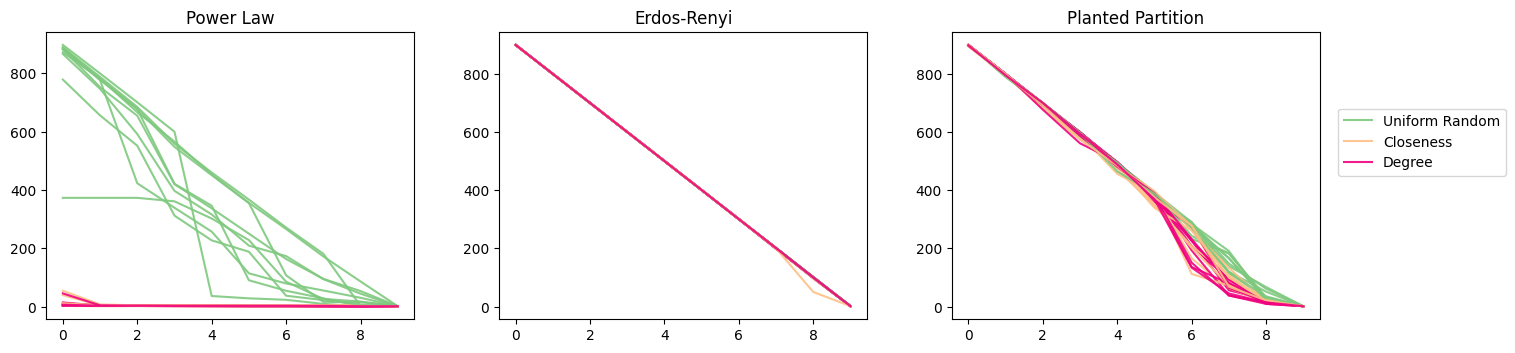

In [9]:
jet = cm = plt.get_cmap('Accent') 
cNorm  = colors.Normalize(vmin=0, vmax=len(percolation_weights))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)

fig, axs = plt.subplots(1, ncols=len(graph_generators), figsize=(14, 4))
fig.tight_layout(pad=3.0)
for i in range(len(graph_generators)):
    axs[i].set_title(graph_labels[i])
    for k in range(10):
        graph = graph_generators[i](N)
        print(nx.is_connected(graph))
        ls = np.array(list(graph.nodes))

        for j in range(len(percolation_weights)):
            color_val = scalarMap.to_rgba(j)
            weight = list(percolation_weights[j](graph))
            ind = np.argsort(weight)
            ls__ = ls.copy()[ind]
            distr, mx = newmann_ziff(graph, ls__, storage_interval = int(graph.number_of_nodes() * 0.1))
            axs[i].plot(np.flip(mx), label=labels[j], color = color_val, alpha=0.9)

axs[-1].legend(labels, loc=(1.05, 0.5))